In [1]:
import sympy
from sympy import symbols, Function, diff, simplify, Eq
from sympy.solvers import solve
import numpy as np
import matplotlib.pyplot as plt

In [4]:
theta_0, k = symbols(r'\theta_0 k')

In [7]:
loss = sympy.log(sympy.sin(theta_0+sympy.sqrt(k/2))**2)
loss

log(sin(\theta_0 + sqrt(2)*sqrt(k)/2)**2)

In [8]:
loss.diff(k)

sqrt(2)*cos(\theta_0 + sqrt(2)*sqrt(k)/2)/(2*sqrt(k)*sin(\theta_0 + sqrt(2)*sqrt(k)/2))

In [20]:
p = Function('p')
x, x_0 = symbols('x x_0')
l = Function('l')

In [16]:
kl = -p(x_0)*sympy.log(p(x)) - (1-p(x_0))*sympy.log(1-p(x))
kl

-(1 - p(x_0))*log(1 - p(x)) - p(x_0)*log(p(x))

In [27]:
simplify(kl.diff(x,x).subs(x_0,x))

-Derivative(p(x), x)**2/((p(x) - 1)*p(x))

In [25]:
div = l(p(x),p(x_0))

In [26]:
div.diff(x,x).subs(x_0,x)

Derivative(l(p(x), p(x)), p(x))*Derivative(p(x), (x, 2)) + Derivative(l(p(x), p(x)), (p(x), 2))*Derivative(p(x), x)**2

In [31]:
p = 1/2*(1+sympy.cos(sympy.sqrt(2)*x-sympy.pi/2))
p

0.5*sin(sqrt(2)*x) + 0.5

In [33]:
div = -p.subs(x,x_0)*sympy.log(p) -(1-p.subs(x,x_0))*sympy.log((1-p))
simplify(div)

0.5*(sin(sqrt(2)*x_0) - 1)*log(0.5 - 0.5*sin(sqrt(2)*x)) - 0.5*(sin(sqrt(2)*x_0) + 1)*log(0.5*sin(sqrt(2)*x) + 0.5)

In [36]:
simplify(div.diff(x,x)).subs(x,x_0)

2.0*(1 - sin(sqrt(2)*x_0)**2)/cos(sqrt(2)*x_0)**2

In [40]:
1/sympy.sqrt(2*p*(1-p))

1/sqrt((0.5 - 0.5*sin(sqrt(2)*x))*(sin(sqrt(2)*x) + 1.0))

In [43]:
sympy.log(p).diff(x)

0.5*sqrt(2)*cos(sqrt(2)*x)/(0.5*sin(sqrt(2)*x) + 0.5)

In [48]:
def kl(p_0, p):
    return -p_0*sympy.log(p) - (1-p_0)*sympy.log(1-p)
def logistic(x):
    return 1/(1+sympy.exp(-x))

In [121]:
p = Function('p')

In [129]:
kl(p(x_0),p(x)).diff(x,x).subs(x_0,x)

Derivative(p(x), x)**2/p(x) - Derivative(p(x), x)**2/(p(x) - 1)

In [53]:
simplify(kl(logistic(x_0),logistic(x)).diff(x,x).subs(x,x_0))

1/(4*cosh(x_0/2)**2)

In [54]:
p = 1/(1+sympy.exp(-2*x))
p

1/(1 + exp(-2*x))

In [57]:
eta = symbols(r'\eta')

In [59]:
step_size = eta*sympy.log(p).diff(x)
new_x = x+step_size
new_x

2*\eta*exp(-2*x)/(1 + exp(-2*x)) + x

In [118]:
sympy.expand(new_x.subs(x,sympy.log(p/(1-p))))

2*\eta*p**2/(2*p**2 - 2*p + 1) - 4*\eta*p/(2*p**2 - 2*p + 1) + 2*\eta/(2*p**2 - 2*p + 1) + log(p/(1 - p))

In [65]:
p=symbols('p')

In [69]:
new_p = logistic(new_x)
new_p = simplify(new_p.subs(x,1/2*sympy.log(p/(1-p))))
new_p

(-p/(p - 1))**0.5*exp(2*\eta/((-p/(p - 1))**1.0 + 1))/((-p/(p - 1))**0.5*exp(2*\eta/((-p/(p - 1))**1.0 + 1)) + 1)

In [70]:
new_p = 1/(1+sympy.exp(-(1/2*sympy.log(p/(1-p))+2*eta*(1-p))))
new_p

1/(exp(-2*\eta*(1 - p))/(p/(1 - p))**0.5 + 1)

In [119]:
new_p

1/(exp(-2*\eta*(1 - p))/(p/(1 - p))**0.5 + 1)

In [113]:
simplify(new_p.diff(eta).subs(eta,0))

2*(-p/(p - 1))**0.5*(1 - p)/((-p/(p - 1))**0.5 + 1)**2

In [74]:
new_circular_x = sympy.asin(2*new_p-1)/sympy.sqrt(2)
new_circular_x

-sqrt(2)*asin(1 - 2/(exp(-2*\eta*(1 - p))/(p/(1 - p))**0.5 + 1))/2

In [75]:
old_circular_x = sympy.asin(2*p-1)/sympy.sqrt(2)
old_circular_x

sqrt(2)*asin(2*p - 1)/2

In [79]:
circular_x_secant = simplify((new_circular_x-old_circular_x)/eta)
circular_x_secant

sqrt(2)*(-asin((-(-p/(p - 1))**0.5 + exp(2*\eta*(p - 1)))/((-p/(p - 1))**0.5 + exp(2*\eta*(p - 1)))) - asin(2*p - 1))/(2*\eta)

In [102]:
circular_x_secant

sqrt(2)*(-asin((-(-p/(p - 1))**0.5 + exp(2*\eta*(p - 1)))/((-p/(p - 1))**0.5 + exp(2*\eta*(p - 1)))) - asin(2*p - 1))/(2*\eta)

In [103]:
new_circular_x

-sqrt(2)*asin(1 - 2/(exp(-2*\eta*(1 - p))/(p/(1 - p))**0.5 + 1))/2

In [110]:
simplify(new_circular_x.diff(eta).subs(eta,0))

2*sqrt(2)*(-p/(p - 1))**0.5*(1 - p)/(sqrt((-(1 - (p/(1 - p))**0.5)**2 + ((p/(1 - p))**0.5 + 1)**2)/((p/(1 - p))**0.5 + 1)**2)*((-p/(p - 1))**0.5 + 1)**2)

In [ ]:
transform = 1/sympy.sqrt(2)*sympy.asin(1/(1+sympy.exp(-2*x))-1)
transform

-sqrt(2)*asin(1 - 1/(1 + exp(-2*x)))/2

In [85]:
simplify(transform.diff(x).subs(x,sympy.log(p/(1-p))))

sqrt(2)*p**2*(p - 1)**2/((p**2 + (p - 1)**2)**2*sqrt(-(1 - p)**4/(p**2 + (1 - p)**2)**2 + 1))

In [86]:
transform.diff(x)

sqrt(2)*exp(-2*x)/(sqrt(1 - (1 - 1/(1 + exp(-2*x)))**2)*(1 + exp(-2*x))**2)

In [89]:
x_step = sympy.log(1/(1+sympy.exp(-2*x))).diff(x)
x_step

2*exp(-2*x)/(1 + exp(-2*x))

In [91]:
simplify(x_step.subs(x, sympy.log(p/(1-p))))

2*(p - 1)**2/(p**2 + (p - 1)**2)

In [98]:
(1/(1+sympy.exp(-2*x))).diff(x)

2*exp(-2*x)/(1 + exp(-2*x))**2

In [95]:
simplify((1/(1+sympy.exp(-2*x))).diff(x).subs(x, sympy.log(p/(1-p))))

2*p**2*(p - 1)**2/(p**2 + (p - 1)**2)**2

In [99]:
sympy.log(1/(1+sympy.exp(-2*x))).diff(x)

2*exp(-2*x)/(1 + exp(-2*x))

In [100]:
g = 1/2*(1+sympy.sin(sympy.sqrt(2)*x))
g

0.5*sin(sqrt(2)*x) + 0.5

In [101]:
g.diff(x)

0.5*sqrt(2)*cos(sqrt(2)*x)

sigma_p, sigma_r, x, y, z, r, p= symbols(r'\sigma_p \sigma_r x y z r p')

In [11]:
r = 1/(sigma_r*sympy.sqrt(2*sympy.pi))*sympy.exp(-1/2*(x/sigma_r)**2)

In [12]:
p=1/(sigma_p*sympy.sqrt(2*sympy.pi))*sympy.exp(-1/2*(x/sigma_r)**2)

In [27]:
simplify(r.subs(x,y-x)*p.subs(x,y)*r.subs(x,z-y)/r.subs(x,z-x))

exp(0.5*(-y**2 - (x - y)**2 + (x - z)**2 - (y - z)**2)/\sigma_r**2)/(2*pi*\sigma_p*\sigma_r)

In [25]:
sympy.simplify(sympy.expand(-y**2-(x-y)**2+(x-z)**2-(y-z)**2))

2*x*y - 2*x*z - 3*y**2 + 2*y*z

In [98]:
x, c = symbols('x c')

In [6]:
sympy.exp(x)

exp(x)

In [84]:
p = 1/(1+sympy.exp(-x))
p

1/(1 + exp(-x))

In [510]:
w = 1/(sympy.exp(1/(sympy.exp(x)+2)-1-c)+2)
w

1/(exp(-c - 1 + 1/(exp(x) + 2)) + 2)

In [511]:
l = -sympy.exp(x)*w
l

-exp(x)/(exp(-c - 1 + 1/(exp(x) + 2)) + 2)

In [512]:
p*w**2+(1-p)*l**2

(1 - 1/(1 + exp(-x)))*exp(2*x)/(exp(-c - 1 + 1/(exp(x) + 2)) + 2)**2 + 1/((1 + exp(-x))*(exp(-c - 1 + 1/(exp(x) + 2)) + 2)**2)

In [18]:
sympy.print_latex(p)

\frac{1}{1 + e^{- x}}


In [19]:
sympy.diff(w,x)

exp(x)*exp(-c - 1 + 1/(exp(x) + 2))/((exp(x) + 2)**2*(exp(-c - 1 + 1/(exp(x) + 2)) + 2)**2)

In [515]:
v = p*w**2+(1-p)*l**2
r = p*sympy.diff(w,x)+(1-p)*sympy.diff(l,x)

In [516]:
r

(1 - 1/(1 + exp(-x)))*(-exp(x)/(exp(-c - 1 + 1/(exp(x) + 2)) + 2) - exp(2*x)*exp(-c - 1 + 1/(exp(x) + 2))/((exp(x) + 2)**2*(exp(-c - 1 + 1/(exp(x) + 2)) + 2)**2)) + exp(x)*exp(-c - 1 + 1/(exp(x) + 2))/((1 + exp(-x))*(exp(x) + 2)**2*(exp(-c - 1 + 1/(exp(x) + 2)) + 2)**2)

In [517]:
v

(1 - 1/(1 + exp(-x)))*exp(2*x)/(exp(-c - 1 + 1/(exp(x) + 2)) + 2)**2 + 1/((1 + exp(-x))*(exp(-c - 1 + 1/(exp(x) + 2)) + 2)**2)

In [518]:
stationary_variance = -1/2*v/r

In [519]:
sympy.simplify(stationary_variance)

0.5*(exp(x) + 1)/(exp((-(c + 1)*(exp(x) + 2) + 1)/(exp(x) + 2)) + 2)

In [28]:
a = symbols('a')

In [29]:
sympy.diff(a,x)

0

In [31]:
g = Function('g')(x)

In [33]:
diff(g,x)

Derivative(g(x), x)

In [34]:
g

g(x)

In [35]:
w = Function('w')(x)

In [36]:
w

w(x)

In [37]:
l = -sympy.exp(x)*w

In [38]:
l

-w(x)*exp(x)

In [41]:
p = 1/(1+sympy.exp(-x))

In [47]:
simplify(-1/2*(p*w**2+(1-p)*l**2)/(p*diff(w,x)+(1-p)*diff(l,x)))

0.5*(exp(x) + 1)*w(x)

In [65]:
w = 2/(1+sympy.exp(x))
l = -2/(1+sympy.exp(-x))

In [51]:
simplify((p*w**2+(1-p)*l**2)/(p*diff(w,x)+(1-p)*diff(l,x)))

-2

In [67]:
v= simplify(p*w**2+(1-p)*l**2)

In [69]:
r = simplify(p*diff(w,x)+ (1-p)*diff(l,x))

In [73]:
r

-1/(2*cosh(x/2)**2)

In [92]:
simplify(1/sympy.sqrt(p*(1-p))*diff(p,x))

sqrt(cosh(x/2)**(-2))/2

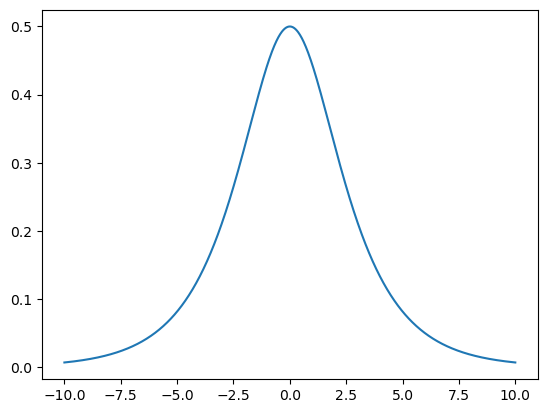

In [94]:
x = np.linspace(-10,10,1000)
plt.plot(x,.5*np.sqrt(1/np.cosh(x/2)**2))

In [82]:
sympy.log(x/(1-x))

AttributeError: 'ImmutableDenseNDimArray' object has no attribute 'as_coefficient'

sqrt(cosh(x/2)**(-2))/2

In [88]:
p

1/(1 + exp(-x))

exp(-x)/(1 + exp(-x))**2

In [193]:
w = Function('w')(x)
l=-sympy.exp(x)*w
p = 1/(1+sympy.exp(-x))

In [100]:
w

w(x)

In [125]:
sigma = symbols(r'\sigma')
eta = symbols(r'\eta')

In [126]:
sigma

\sigma

In [124]:
w=2/(sympy.exp(x)+1)
l=-2/(1+sympy.exp(-x))

In [197]:
next_var = simplify(p*sigma**2*(1+eta*diff(w,x))**2 + (1-p)*sigma**2*(1+eta*diff(l,x))**2+p*(x+eta*w)**2+(1-p)*(x+eta*l)**2-(p*(x+eta*w)+(1-p)*(x+eta*l))**2)

In [245]:
sympy.dsolve(diff(next_var,x),w)

NotImplementedError: The given ODE \eta*\sigma**2*w(x)**2*exp(2*x) + 2*\eta*\sigma**2*w(x)**2*exp(x) + 4*\eta*\sigma**2*w(x)*exp(2*x)*Derivative(w(x), x) + 2*\eta*\sigma**2*w(x)*exp(2*x)*Derivative(w(x), (x, 2)) + 6*\eta*\sigma**2*w(x)*exp(x)*Derivative(w(x), x) + 2*\eta*\sigma**2*w(x)*exp(x)*Derivative(w(x), (x, 2)) + 3*\eta*\sigma**2*exp(2*x)*Derivative(w(x), x)**2 + 2*\eta*\sigma**2*exp(2*x)*Derivative(w(x), x)*Derivative(w(x), (x, 2)) + 4*\eta*\sigma**2*exp(x)*Derivative(w(x), x)**2 + 4*\eta*\sigma**2*exp(x)*Derivative(w(x), x)*Derivative(w(x), (x, 2)) + \eta*\sigma**2*Derivative(w(x), x)**2 + 2*\eta*\sigma**2*Derivative(w(x), x)*Derivative(w(x), (x, 2)) + \eta*w(x)**2*exp(2*x) + 2*\eta*w(x)**2*exp(x) + \eta*w(x)**2 + 2*\eta*w(x)*exp(2*x)*Derivative(w(x), x) + 4*\eta*w(x)*exp(x)*Derivative(w(x), x) + 2*\eta*w(x)*Derivative(w(x), x) - 2*\sigma**2*w(x) - 2*\sigma**2*exp(x)*Derivative(w(x), x) - 2*\sigma**2*Derivative(w(x), x) cannot be solved by the factorable group method

In [108]:
eta

\eta

In [286]:
mu = symbols(r'\mu')
theta = symbols(r'\theta')

In [127]:
mu

\mu

In [204]:
sigma = Function(r'\sigma')
prior = Function(r'\pi')(x)

In [166]:
prior

\pi(x)

In [279]:
simplify(solve(diff(-1/2*(x-mu)**2/(sigma(mu)**2+diff(sigma(mu),mu)*(x-mu)*2*sigma(mu)) - 1/2*sympy.log(sigma(mu)**2+diff(sigma(mu),mu)*(x-mu)*2*sigma(mu)),x),x)[1])

1.0*\mu + 1.0*sqrt(Derivative(\sigma(\mu), \mu)**4 + 0.25)*\sigma(\mu)/Derivative(\sigma(\mu), \mu) - 1.0*\sigma(\mu)*Derivative(\sigma(\mu), \mu) - 0.5*\sigma(\mu)/Derivative(\sigma(\mu), \mu)

In [258]:
solve((x-mu)**2*diff(sigma(mu),mu)+(2*(mu-x)*diff(sigma(mu),mu)-sigma(mu))*(-mu+x+sigma(mu)*diff(sigma(mu),mu)),x)[1]

\mu + sqrt(4*Derivative(\sigma(\mu), \mu)**4 + 1)*\sigma(\mu)/(2*Derivative(\sigma(\mu), \mu)) - \sigma(\mu)*Derivative(\sigma(\mu), \mu) - \sigma(\mu)/(2*Derivative(\sigma(\mu), \mu))

In [217]:
log_proportional = -.5*((x-mu)**2/(sigma(mu)+2*diff(sigma(x),x)(mu)()))-.5*sympy.log(sigma(x)**2)
log_proportional

-0.5*(-\mu + x)**2/\sigma(x)**2 - 0.5*log(\sigma(x)**2)

In [216]:
simplify(diff(log_proportional,x))

(1.0*(\mu - x)**2*Derivative(\sigma(x), x) + 1.0*(\mu - x)*\sigma(x) - \sigma(x)**2*Derivative(\sigma(x), x))/\sigma(x)**3

In [211]:
(x*1000+sympy.sqrt(1000**2+1/4)*sigma(x)-sigma(x))/1000

x + 0.999000124999992*\sigma(x)

In [162]:
x-sigma/(2*diff(sigma,x))*(-1+sympy.sqrt(1+4*diff(sigma,x)**2))

x - (sqrt(4*Derivative(\sigma(x), x)**2 + 1) - 1)*\sigma(x)/(2*Derivative(\sigma(x), x))

In [160]:
diff(diff(log_proportional,x),x)

2.0*(-2*\mu + 2*x)*Derivative(\sigma(x), x)/\sigma(x)**3 + 1.0*(-\mu + x)**2*Derivative(\sigma(x), (x, 2))/\sigma(x)**3 - 3.0*(-\mu + x)**2*Derivative(\sigma(x), x)**2/\sigma(x)**4 - Derivative(\sigma(x), (x, 2))/\sigma(x) + Derivative(\sigma(x), x)**2/\sigma(x)**2 - 1.0/\sigma(x)**2

In [167]:
simplify(diff(diff(log_proportional,x),x).subs(mu,x-sigma/(2*diff(sigma,x))*(-1+sympy.sqrt(1+4*diff(sigma,x)**2))))

1.0*(-0.5*sqrt(4*Derivative(\sigma(x), x)**2 + 1)*\sigma(x)*Derivative(\sigma(x), (x, 2)) + 3.5*sqrt(4*Derivative(\sigma(x), x)**2 + 1)*Derivative(\sigma(x), x)**2 + 0.5*\sigma(x)*Derivative(\sigma(x), (x, 2)) - 2.0*Derivative(\sigma(x), x)**4 - 4.5*Derivative(\sigma(x), x)**2)/(\sigma(x)**2*Derivative(\sigma(x), x)**2)

In [172]:
diff(log_proportional+sympy.log(prior),x)

-0.5*(-2*\mu + 2*x)/\sigma(x)**2 + 1.0*(-\mu + x)**2*Derivative(\sigma(x), x)/\sigma(x)**3 - Derivative(\sigma(x), x)/\sigma(x) + Derivative(\pi(x), x)/\pi(x)

In [150]:
x-sigma/diff(sigma,x)

x - \sigma(x)/Derivative(\sigma(x), x)

In [151]:
diff(diff(((x-mu)/sigma)**2,x),x).subs(mu,x-sigma/diff(sigma,x))

-2*Derivative(\sigma(x), (x, 2))/(\sigma(x)*Derivative(\sigma(x), x)**2)

In [146]:
solve(diff(((x-mu)/sigma)**2,x),x)

NotImplementedError: multiple generators [x, \sigma(x)]
No algorithms are implemented to solve equation -2*_Dummy_406*(-\mu + x)**2/\sigma(x)**3 + (-2*\mu + 2*x)/\sigma(x)**2

In [284]:
simplify(diff(sympy.log(1-1/(1+sympy.exp(-x))),x))

-exp(x)/(exp(x) + 1)

-\eta*\theta

In [313]:
sigma_0 = symbols(r'\sigma_0')
sigma = symbols(r'\sigma')
mu = symbols(r'\mu')
mu_0 = symbols(r'\mu_0')
eta = symbols(r'\eta')
theta = symbols(r'\theta')
t, t_prime = symbols("t t'")

In [314]:
t_prime

t'

In [369]:
mean = mu+(mu_0-mu)*sympy.exp(-eta*theta*(t-t_prime))
variance = eta*sigma**2/(2*theta)+(sigma_0**2-eta*sigma**2/(2*theta))*sympy.exp(-2*eta*theta*(t-t_prime))

In [377]:
loss = simplify(variance+mean**2-2*mu*mean+mu**2)
loss

(\eta*\sigma**2*exp(2*\eta*\theta*(t - t'))/2 - \eta*\sigma**2/2 + \mu**2*\theta - 2*\mu*\mu_0*\theta + \mu_0**2*\theta + \sigma_0**2*\theta)*exp(2*\eta*\theta*(-t + t'))/\theta

In [394]:
optimal_loss_eta = solve(diff(diff(loss,t).subs(t,t_prime),eta),eta)[0]

In [396]:
loss.subs(t,t_prime)

(\mu**2*\theta - 2*\mu*\mu_0*\theta + \mu_0**2*\theta + \sigma_0**2*\theta)/\theta

In [400]:
diff(mean,t).subs(t,t_prime)

-\eta*\theta*(-\mu + \mu_0)

In [402]:
diff(variance,t).subs(t,t_prime)

-2*\eta*\theta*(-\eta*\sigma**2/(2*\theta) + \sigma_0**2)

In [406]:
mu_0 = Function(r'\mu_0')(t)
sigma_0 = Function(r'\sigma_0')(t)

In [407]:
eta = theta*((mu-mu_0)**2+sigma_0**2)/sigma**2

In [410]:
simplify(-eta*theta*(mu_0-mu))

\theta**2*(\mu - \mu_0(t))*((\mu - \mu_0(t))**2 + \sigma_0(t)**2)/\sigma**2

In [412]:
simplify(eta**2*sigma**2-2*theta*eta*sigma_0**2)

\theta**2*((\mu - \mu_0(t))**2 - \sigma_0(t)**2)*((\mu - \mu_0(t))**2 + \sigma_0(t)**2)/\sigma**2

In [419]:
diff(mu_0,t)-theta**2*(mu-mu_0)*((mu-mu_0)**2+sigma_0**2)/sigma**2

Derivative(\mu_0(t), t) - \theta**2*(\mu - \mu_0(t))*((\mu - \mu_0(t))**2 + \sigma_0(t)**2)/\sigma**2

In [420]:
diff(sigma_0,t)-theta**2/(2*sigma**2*sigma_0)*((mu-mu_0)**4-sigma_0**4)

Derivative(\sigma_0(t), t) - \theta**2*((\mu - \mu_0(t))**4 - \sigma_0(t)**4)/(2*\sigma**2*\sigma_0(t))

In [425]:
mu_prime_eq = Eq(diff(mu_0,t),theta**2*(mu-mu_0)*((mu-mu_0)**2+sigma_0**2)/sigma**2)

In [426]:
sigma_prime_eq = Eq(diff(sigma_0,t),theta**2/(2*sigma**2*sigma_0)*((mu-mu_0)**4-sigma_0**4))

In [429]:
sympy.expand(theta**2*(mu-mu_0)*((mu-mu_0)**2+sigma_0**2)/sigma**2)

\mu**3*\theta**2/\sigma**2 - 3*\mu**2*\theta**2*\mu_0(t)/\sigma**2 + 3*\mu*\theta**2*\mu_0(t)**2/\sigma**2 + \mu*\theta**2*\sigma_0(t)**2/\sigma**2 - \theta**2*\mu_0(t)**3/\sigma**2 - \theta**2*\mu_0(t)*\sigma_0(t)**2/\sigma**2

In [434]:
c_1, c_2= symbols('c_1 c_2')


c_2

In [435]:
mu_0 = 1/(theta**2/sigma**2*c_1*t-c_2)

In [444]:
sigma_0 = sympy.sqrt(simplify((1/(theta**2/sigma**2*c_1*t-c_2)+c_1)*1/(theta**2/sigma**2*c_1*t-c_2)))

In [450]:
simplify(diff(mu_0,t))

-\sigma**2*\theta**2*c_1/(\sigma**2*c_2 - \theta**2*c_1*t)**2

In [446]:
simplify(diff(sigma_0,t))

\theta**2*c_1*sqrt(\sigma**2*(\sigma**2 - c_1*(\sigma**2*c_2 - \theta**2*c_1*t))/(\sigma**2*c_2 - \theta**2*c_1*t)**2)*(2*\sigma**2 - c_1*(\sigma**2*c_2 - \theta**2*c_1*t))/(2*(\sigma**2 - c_1*(\sigma**2*c_2 - \theta**2*c_1*t))*(\sigma**2*c_2 - \theta**2*c_1*t))

In [449]:
simplify(theta**2/sigma**2*mu_0*(mu_0**2-sigma_0**2))

-\sigma**2*\theta**2*c_1/(\sigma**2*c_2 - \theta**2*c_1*t)**2

In [456]:
simplify(theta**2/(2*sigma**2*sigma_0)*(mu_0**4-sigma_0**4))

\sigma**2*\theta**2*(\sigma**4 - (\sigma**2 - c_1*(\sigma**2*c_2 - \theta**2*c_1*t))**2)/(2*sqrt(\sigma**2*(\sigma**2 - c_1*(\sigma**2*c_2 - \theta**2*c_1*t))/(\sigma**2*c_2 - \theta**2*c_1*t)**2)*(\sigma**2*c_2 - \theta**2*c_1*t)**4)

In [465]:
x_0 = symbols('x_0')
s_0 = symbols('s_0')

In [461]:
mu_0.subs(c_2,1/(mu-x_0))

1/(-1/(\mu - x_0) + \theta**2*c_1*t/\sigma**2)

In [467]:
sigma_0

sqrt(\sigma**2*(\sigma**2 - c_1*(\sigma**2*c_2 - \theta**2*c_1*t))/(\sigma**2*c_2 - \theta**2*c_1*t)**2)

In [472]:
c_1_solved = solve(sigma_0.subs(c_2,1/(mu-x_0)).subs(t,0)-s_0,c_1)[0]

In [480]:
determined_mu_0 = simplify(mu_0.subs(c_2,1/(mu-x_0)).subs(c_1,c_1_solved))

In [478]:
determined_sigma_0 = simplify(sigma_0.subs(c_2,1/(mu-x_0)).subs(c_1,c_1_solved)**2)
determined_sigma_0

\sigma**2*(\sigma**2*(\mu - x_0)**2 - (\sigma**2 - \theta**2*t*(\mu**2 - 2*\mu*x_0 - s_0**2 + x_0**2))*(\mu**2 - 2*\mu*x_0 - s_0**2 + x_0**2))/(\sigma**2 - \theta**2*t*(\mu**2 - 2*\mu*x_0 - s_0**2 + x_0**2))**2

In [488]:
simplify(determined_sigma_0.subs(mu,0))

\sigma**2*(\sigma**2*x_0**2 + (\sigma**2 + \theta**2*t*(s_0**2 - x_0**2))*(s_0**2 - x_0**2))/(\sigma**2 + \theta**2*t*(s_0**2 - x_0**2))**2

In [498]:
determined_eta = simplify(theta*((mu-determined_mu_0)**2+determined_sigma_0**2)/sigma**2)

In [520]:
loss

(\eta*\sigma**2*exp(2*\eta*\theta*(t - t'))/2 - \eta*\sigma**2/2 + \mu**2*\theta - 2*\mu*\mu_0*\theta + \mu_0**2*\theta + \sigma_0**2*\theta)*exp(2*\eta*\theta*(-t + t'))/\theta

In [523]:
sympy.expand(determined_eta.subs(s_0,0).subs(x_0,0))

\mu**10*\theta**9*t**4/(\mu**8*\sigma**2*\theta**8*t**4 - 4*\mu**6*\sigma**4*\theta**6*t**3 + 6*\mu**4*\sigma**6*\theta**4*t**2 - 4*\mu**2*\sigma**8*\theta**2*t + \sigma**10) + \mu**8*\sigma**4*\theta**5*t**2/(\mu**8*\sigma**2*\theta**8*t**4 - 4*\mu**6*\sigma**4*\theta**6*t**3 + 6*\mu**4*\sigma**6*\theta**4*t**2 - 4*\mu**2*\sigma**8*\theta**2*t + \sigma**10) - 6*\mu**8*\sigma**2*\theta**7*t**3/(\mu**8*\sigma**2*\theta**8*t**4 - 4*\mu**6*\sigma**4*\theta**6*t**3 + 6*\mu**4*\sigma**6*\theta**4*t**2 - 4*\mu**2*\sigma**8*\theta**2*t + \sigma**10) + 13*\mu**6*\sigma**4*\theta**5*t**2/(\mu**8*\sigma**2*\theta**8*t**4 - 4*\mu**6*\sigma**4*\theta**6*t**3 + 6*\mu**4*\sigma**6*\theta**4*t**2 - 4*\mu**2*\sigma**8*\theta**2*t + \sigma**10) - 12*\mu**4*\sigma**6*\theta**3*t/(\mu**8*\sigma**2*\theta**8*t**4 - 4*\mu**6*\sigma**4*\theta**6*t**3 + 6*\mu**4*\sigma**6*\theta**4*t**2 - 4*\mu**2*\sigma**8*\theta**2*t + \sigma**10) + 4*\mu**2*\sigma**8*\theta/(\mu**8*\sigma**2*\theta**8*t**4 - 4*\mu**6*\sig

In [525]:
determined_mu_0

\sigma**2*(-\mu + x_0)/(\sigma**2 - \theta**2*t*(\mu**2 - 2*\mu*x_0 - s_0**2 + x_0**2))

In [531]:
solve(mu_0.subs(t,0)-x_0,c_2)[0]

1/(\mu - x_0)

In [533]:
simplify(mu_0.subs(c_2,1/(mu-x_0)).subs(c_1,c_1_solved))

(\mu*(\sigma**2 - \theta**2*t*(\mu**2 - 2*\mu*x_0 - s_0**2 + x_0**2)) - \sigma**2*(\mu - x_0))/(\sigma**2 - \theta**2*t*(\mu**2 - 2*\mu*x_0 - s_0**2 + x_0**2))

In [495]:
simplify((theta*((mu-determined_mu_0)**2+determined_sigma_0**2)/sigma**2).subs(mu,0))

\sigma**2*\theta*(x_0**2*(\sigma**2 + \theta**2*t*(s_0**2 - x_0**2))**2 + (\sigma**2*x_0**2 + (\sigma**2 + \theta**2*t*(s_0**2 - x_0**2))*(s_0**2 - x_0**2))**2)/(\sigma**2 + \theta**2*t*(s_0**2 - x_0**2))**4

In [427]:
sympy.solvers.ode.systems.dsolve_system([mu_prime_eq,sigma_prime_eq])

NotImplementedError: 
The system of ODEs passed cannot be solved by dsolve_system.

In [414]:
sympy.Derivative(mu_0,t)

Derivative(\mu_0(t), t)

In [372]:
optimal_loss_eta = solve(diff(diff(loss,t),eta),eta)[1]

In [389]:
simplify(optimal_loss_eta.subs(t_prime,0).subs(t,.00001))

(1.0*\mu**2*\theta**2 - 2.0*\mu*\mu_0*\theta**2 + 1.0*\mu_0**2*\theta**2 + 50000.0*\sigma**2 + 1.0*\sigma_0**2*\theta**2 + 50000.0*sqrt(4.0e-10*\mu**4*\theta**4 - 1.6e-9*\mu**3*\mu_0*\theta**4 + 2.4e-9*\mu**2*\mu_0**2*\theta**4 + 8.0e-10*\mu**2*\sigma_0**2*\theta**4 - 1.6e-9*\mu*\mu_0**3*\theta**4 - 1.6e-9*\mu*\mu_0*\sigma_0**2*\theta**4 + 4.0e-10*\mu_0**4*\theta**4 + 8.0e-10*\mu_0**2*\sigma_0**2*\theta**4 + \sigma**4 + 4.0e-10*\sigma_0**4*\theta**4))/(\sigma**2*\theta)

In [380]:
optimal_loss_over_time = simplify(loss.subs(eta,optimal_loss_eta))

In [381]:
optimal_loss_over_time

(-\mu**2*\theta**2*t/2 + \mu**2*\theta**2*t'/2 + \mu*\mu_0*\theta**2*t - \mu*\mu_0*\theta**2*t' - \mu_0**2*\theta**2*t/2 + \mu_0**2*\theta**2*t'/2 - \sigma**2/4 - \sigma_0**2*\theta**2*t/2 + \sigma_0**2*\theta**2*t'/2 + \theta**2*(t - t')*(\mu**2 - 2*\mu*\mu_0 + \mu_0**2 + \sigma_0**2) + (2*\mu**2*\theta**2*t - 2*\mu**2*\theta**2*t' - 4*\mu*\mu_0*\theta**2*t + 4*\mu*\mu_0*\theta**2*t' + 2*\mu_0**2*\theta**2*t - 2*\mu_0**2*\theta**2*t' + \sigma**2 + 2*\sigma_0**2*\theta**2*t - 2*\sigma_0**2*\theta**2*t' + sqrt(4*\mu**4*\theta**4*t**2 - 8*\mu**4*\theta**4*t*t' + 4*\mu**4*\theta**4*t'**2 - 16*\mu**3*\mu_0*\theta**4*t**2 + 32*\mu**3*\mu_0*\theta**4*t*t' - 16*\mu**3*\mu_0*\theta**4*t'**2 + 24*\mu**2*\mu_0**2*\theta**4*t**2 - 48*\mu**2*\mu_0**2*\theta**4*t*t' + 24*\mu**2*\mu_0**2*\theta**4*t'**2 + 8*\mu**2*\sigma_0**2*\theta**4*t**2 - 16*\mu**2*\sigma_0**2*\theta**4*t*t' + 8*\mu**2*\sigma_0**2*\theta**4*t'**2 - 16*\mu*\mu_0**3*\theta**4*t**2 + 32*\mu*\mu_0**3*\theta**4*t*t' - 16*\mu*\mu_0**3

In [335]:
solve(diff(loss,t),eta)

[0, 2*\theta*(\mu**2 - 2*\mu*\mu_0 + \mu_0**2 + \sigma_0**2)/\sigma**2]

In [340]:
optimal_loss_eta = solve(diff(loss,t),eta)[1]

In [343]:
loss.subs(eta,optimal_loss_eta)

2*\mu**2 - 2*\mu*\mu_0 - 2*\mu*(\mu + (-\mu + \mu_0)*exp(-2*\theta**2*(t - t')*(\mu**2 - 2*\mu*\mu_0 + \mu_0**2 + \sigma_0**2)/\sigma**2)) + \mu_0**2 + \sigma_0**2 + (\mu + (-\mu + \mu_0)*exp(-2*\theta**2*(t - t')*(\mu**2 - 2*\mu*\mu_0 + \mu_0**2 + \sigma_0**2)/\sigma**2))**2 + (-\mu**2 + 2*\mu*\mu_0 - \mu_0**2)*exp(-4*\theta**2*(t - t')*(\mu**2 - 2*\mu*\mu_0 + \mu_0**2 + \sigma_0**2)/\sigma**2)

In [327]:
solve(diff(diff(variance,t),eta),eta)[1]

(\sigma**2/2 + \sigma_0**2*\theta**2*t - \sigma_0**2*\theta**2*t' + sqrt(\sigma**4 + 4*\sigma_0**4*\theta**4*t**2 - 8*\sigma_0**4*\theta**4*t*t' + 4*\sigma_0**4*\theta**4*t'**2)/2)/(\sigma**2*\theta*(t - t'))

In [296]:
variance_decay_rate = simplify(-eta*theta/(1+1/(2*theta*(sigma_0**2/(eta*sigma**2)-1/(2*theta)))))

In [298]:
solve(variance_decay_rate,eta)[1]

2*\sigma_0**2*\theta/\sigma**2

In [303]:
solve(diff(variance_decay_rate,eta),eta)[0]

\sigma_0**2*\theta/\sigma**2

In [542]:
n, a, b, p = symbols('n a b p')

In [597]:
mean = (a+n*p)/(a+b+n)
variance = n*p*(1-p)/(a+b+n)**2

In [601]:
sympy.expand(simplify((1/(2*p*(1-p))*(variance+mean**2-2*p*mean+p**2)).subs(n,n-a-b).subs(a,n_0*p_0).subs(b,n_0*(1-p_0))))

n*p**2/(2*n**2*p**2 - 2*n**2*p) - n*p/(2*n**2*p**2 - 2*n**2*p) - n_0**2*p**2/(2*n**2*p**2 - 2*n**2*p) + 2*n_0**2*p*p_0/(2*n**2*p**2 - 2*n**2*p) - n_0**2*p_0**2/(2*n**2*p**2 - 2*n**2*p) - n_0*p**2/(2*n**2*p**2 - 2*n**2*p) + n_0*p/(2*n**2*p**2 - 2*n**2*p)

In [595]:
sympy.expand(simplify((1/(2*p*(1-p))*(variance+mean**2-2*p*mean+p**2)).subs(n,n-a-b)))

-a**2*p**2/(2*n**2*p**2 - 2*n**2*p) + 2*a**2*p/(2*n**2*p**2 - 2*n**2*p) - a**2/(2*n**2*p**2 - 2*n**2*p) - 2*a*b*p**2/(2*n**2*p**2 - 2*n**2*p) + 2*a*b*p/(2*n**2*p**2 - 2*n**2*p) - a*p**2/(2*n**2*p**2 - 2*n**2*p) + a*p/(2*n**2*p**2 - 2*n**2*p) - b**2*p**2/(2*n**2*p**2 - 2*n**2*p) - b*p**2/(2*n**2*p**2 - 2*n**2*p) + b*p/(2*n**2*p**2 - 2*n**2*p) + n*p**2/(2*n**2*p**2 - 2*n**2*p) - n*p/(2*n**2*p**2 - 2*n**2*p)

In [594]:
sympy.expand(simplify(((1/(2*p*(1-p))*(variance+mean**2-2*p*mean+p**2)).subs(n,n-a-b)*2*p*(1-p)+p**2/n-p/n)*n**2))/(2*(a+b)*p*(1-p))

(a**2*p**2 - 2*a**2*p + a**2 + 2*a*b*p**2 - 2*a*b*p + a*p**2 - a*p + b**2*p**2 + b*p**2 - b*p)/(p*(1 - p)*(2*a + 2*b))

In [596]:
loss = sympy.expand(simplify(((1/(2*p*(1-p))*(variance+mean**2-2*p*mean+p**2)).subs(n,n-a-b)*2*p*(1-p)+p**2/n-p/n)*n**2))/(2*(a+b)*p*(1-p))
loss

(a**2*p**2 - 2*a**2*p + a**2 + 2*a*b*p**2 - 2*a*b*p + a*p**2 - a*p + b**2*p**2 + b*p**2 - b*p)/(p*(1 - p)*(2*a + 2*b))

In [590]:
n_0, p_0 = symbols('n_0 p_0')

In [593]:
simplify(loss.subs(a,n_0*p_0).subs(b,n_0*(1-p_0)))

(-n_0*p**2 + 2*n_0*p*p_0 - n_0*p_0**2 - p**2 + p)/(2*p*(p - 1))

In [551]:
simplify(-n*p**2/(-2*n**2*p**2+2*n**2*p))

p/(2*n*(p - 1))

In [559]:
(a**2*p**2-2*a**2*p+a**2+2*a*b*p**2-2*a*b*p+a*p**2-a*p+b**2*p**2+b*p**2-b*p)

a**2*p**2 - 2*a**2*p + a**2 + 2*a*b*p**2 - 2*a*b*p + a*p**2 - a*p + b**2*p**2 + b*p**2 - b*p

In [610]:
alpha, beta, gamma = symbols(r'\alpha \beta \gamma')

In [608]:
beta_pdf = p**(alpha-1)*(1-p)**(beta-1)/sympy.functions.special.beta_functions.beta(alpha,beta)
beta_pdf

p**(\alpha - 1)*(1 - p)**(\beta - 1)/beta(\alpha, \beta)

In [611]:
gamma*diff(beta_pdf,alpha)*alpha/(alpha+beta) + (1-gamma)

\alpha*(p**(\alpha - 1)*(1 - p)**(\beta - 1)*(-polygamma(0, \alpha) + polygamma(0, \alpha + \beta))/beta(\alpha, \beta) + p**(\alpha - 1)*(1 - p)**(\beta - 1)*log(p)/beta(\alpha, \beta))/(\alpha + \beta)

In [613]:
alpha_0, beta_0, p_0 = symbols(r'\alpha_0 \beta_0 p_0')

In [622]:
simplify(((alpha_0-1)*(beta_0-1)/((alpha_0+beta_0-2)**2*(alpha_0+beta_0-1))+((alpha_0-1)/(alpha_0+beta_0-2))**2-2*p_0*(alpha_0-1)/(alpha_0+beta_0-2)+p_0**2)*(alpha_0+beta_0-1)*(alpha_0+beta_0-2)/((alpha_0-1)*(beta_0-1)))

\alpha_0**3*p_0**2/(\alpha_0**2*\beta_0 - \alpha_0**2 + \alpha_0*\beta_0**2 - 4*\alpha_0*\beta_0 + 3*\alpha_0 - \beta_0**2 + 3*\beta_0 - 2) - 2*\alpha_0**3*p_0/(\alpha_0**2*\beta_0 - \alpha_0**2 + \alpha_0*\beta_0**2 - 4*\alpha_0*\beta_0 + 3*\alpha_0 - \beta_0**2 + 3*\beta_0 - 2) + \alpha_0**3/(\alpha_0**2*\beta_0 - \alpha_0**2 + \alpha_0*\beta_0**2 - 4*\alpha_0*\beta_0 + 3*\alpha_0 - \beta_0**2 + 3*\beta_0 - 2) + 3*\alpha_0**2*\beta_0*p_0**2/(\alpha_0**2*\beta_0 - \alpha_0**2 + \alpha_0*\beta_0**2 - 4*\alpha_0*\beta_0 + 3*\alpha_0 - \beta_0**2 + 3*\beta_0 - 2) - 4*\alpha_0**2*\beta_0*p_0/(\alpha_0**2*\beta_0 - \alpha_0**2 + \alpha_0*\beta_0**2 - 4*\alpha_0*\beta_0 + 3*\alpha_0 - \beta_0**2 + 3*\beta_0 - 2) + \alpha_0**2*\beta_0/(\alpha_0**2*\beta_0 - \alpha_0**2 + \alpha_0*\beta_0**2 - 4*\alpha_0*\beta_0 + 3*\alpha_0 - \beta_0**2 + 3*\beta_0 - 2) - 5*\alpha_0**2*p_0**2/(\alpha_0**2*\beta_0 - \alpha_0**2 + \alpha_0*\beta_0**2 - 4*\alpha_0*\beta_0 + 3*\alpha_0 - \beta_0**2 + 3*\beta_0 -

In [618]:
simplify(sympy.functions.special.beta_functions.beta(alpha_0-1,beta_0-1)/sympy.functions.special.beta_functions.beta(alpha_0, beta_0))

beta(\alpha_0 - 1, \beta_0 - 1)/beta(\alpha_0, \beta_0)

In [623]:
n_0

n_0

In [630]:
a_0, b_0 = symbols('a_0 b_0')

In [639]:
loss_derivative = -a_0/(a_0+b_0)*sympy.log(p_0)-b_0/(a_0+b_0)*sympy.log(1-p_0) + a_0/(a_0+b_0)*sympy.digamma(a_0+1) + b_0/(a_0+b_0)*sympy.digamma(b_0+1) - sympy.digamma(a_0+b_0+1) -1/(2*n_0)

In [643]:
simplify(loss_derivative.subs(n_0, a_0+b_0).subs(p_0, a_0/(a_0+b_0)).subs(a_0,10).subs(b_0,7))

-log(8235430000000000)/17 - 1662371/2450448 + log(17)

In [644]:
import numpy as np

In [647]:
-np.log(8235430000000000)/17 - 1662371/2450448 + np.log(17)

-0.0009003217401364338

In [651]:
p_hat, n_hat = symbols(r'\hat{p} \hat{n}')
k=symbols('k')

In [656]:
simplify(-(k+n_0*p_0)*p_hat**2/(n_hat*p_hat+k)**2 - (n-k+n_0*(1-p_0))*(1-p_hat)**2/(n_hat*(1-p_hat)+n-k)**2)

(-\hat{p}**2*(k + n_0*p_0)*(\hat{n}*(\hat{p} - 1) + k - n)**2 + (\hat{p} - 1)**2*(\hat{n}*\hat{p} + k)**2*(k - n + n_0*(p_0 - 1)))/((\hat{n}*\hat{p} + k)**2*(\hat{n}*(\hat{p} - 1) + k - n)**2)

In [661]:
2*n_0*p_0*sympy.log(n_0*p_0+n_hat*p_hat) + (-2*n_0*p_0+n+n_0)*sympy.log(n+n_hat*(1-p_hat)-n_0*p_0) + (n_hat*p_hat/(n_0*p_0+n_hat*p_hat)**2+(n-n_0+2*n_hat*(1-p_hat))/(2*(n-n_0*p_0+n_hat*(1-p_hat))))*(n*n_0**2*p_0*(1-p_0))*(n_0+n)/(n_0**2*(n_0+1))

n*p_0*(1 - p_0)*(n + n_0)*(\hat{n}*\hat{p}/(\hat{n}*\hat{p} + n_0*p_0)**2 + (2*\hat{n}*(1 - \hat{p}) + n - n_0)/(2*\hat{n}*(1 - \hat{p}) + 2*n - 2*n_0*p_0))/(n_0 + 1) + 2*n_0*p_0*log(\hat{n}*\hat{p} + n_0*p_0) + (n - 2*n_0*p_0 + n_0)*log(\hat{n}*(1 - \hat{p}) + n - n_0*p_0)

In [662]:
simplify(2*n_0*p_0*sympy.log(n_0*p_0+n_hat*p_hat) + (-2*n_0*p_0+n+n_0)*sympy.log(n+n_hat*(1-p_hat)-n_0*p_0) + (n_hat*p_hat/(n_0*p_0+n_hat*p_hat)**2+(n-n_0+2*n_hat*(1-p_hat))/(2*(n-n_0*p_0+n_hat*(1-p_hat))))*(n*n_0**2*p_0*(1-p_0))*(n_0+n)/(n_0**2*(n_0+1)))

(-n*p_0*(n + n_0)*(p_0 - 1)*(2*\hat{n}*\hat{p}*(\hat{n}*(\hat{p} - 1) - n + n_0*p_0) + (\hat{n}*\hat{p} + n_0*p_0)**2*(2*\hat{n}*(\hat{p} - 1) - n + n_0))/2 + (n_0 + 1)*(\hat{n}*\hat{p} + n_0*p_0)**2*(2*n_0*p_0*log(\hat{n}*\hat{p} + n_0*p_0) + (n - 2*n_0*p_0 + n_0)*log(-\hat{n}*(\hat{p} - 1) + n - n_0*p_0))*(\hat{n}*(\hat{p} - 1) - n + n_0*p_0))/((n_0 + 1)*(\hat{n}*\hat{p} + n_0*p_0)**2*(\hat{n}*(\hat{p} - 1) - n + n_0*p_0))

In [667]:
diff(diff(2*n_0*p_0*sympy.log(n_0*p_0+n_hat*p_hat) + (-2*n_0*p_0+n+n_0)*sympy.log(n+n_hat*(1-p_hat)-n_0*p_0) + (n_hat*p_hat/(n_0*p_0+n_hat*p_hat)**2+(n-n_0+2*n_hat*(1-p_hat))/(2*(n-n_0*p_0+n_hat*(1-p_hat))))*(n*n_0**2*p_0*(1-p_0))*(n_0+n)/(n_0**2*(n_0+1)),n_hat),n_hat).subs(n_hat,n_0)

-2*\hat{p}**2*n_0*p_0/(\hat{p}*n_0 + n_0*p_0)**2 + n*p_0*(1 - p_0)*(n + n_0)*(6*\hat{p}**3*n_0/(\hat{p}*n_0 + n_0*p_0)**4 - 4*\hat{p}**2/(\hat{p}*n_0 + n_0*p_0)**3 + 2*(2 - 2*\hat{p})*(2*\hat{p} - 2)/(2*n - 2*n_0*p_0 + 2*n_0*(1 - \hat{p}))**2 + (2*\hat{p} - 2)*(4*\hat{p} - 4)*(n + 2*n_0*(1 - \hat{p}) - n_0)/(2*n - 2*n_0*p_0 + 2*n_0*(1 - \hat{p}))**3)/(n_0 + 1) + (1 - \hat{p})*(\hat{p} - 1)*(n - 2*n_0*p_0 + n_0)/(n - n_0*p_0 + n_0*(1 - \hat{p}))**2

In [669]:
a_hat, b_hat=sympy.symbols('\hat{a} \hat{b}')

In [680]:
divergence = sympy.log(sympy.gamma(a_hat+b_hat+n)*sympy.gamma(a_hat)*sympy.gamma(b_hat)/(sympy.gamma(a_hat+b_hat)))-sympy.gamma(n+1)*sympy.gamma(a_0+b_0)/(sympy.gamma(a_0)*sympy.gamma(b_0)*sympy.gamma(a_0+b_0+n))*sympy.Sum(sympy.gamma(a_0+k)*sympy.gamma(b_0+n-k)/(sympy.gamma(k+1)*sympy.gamma(n-k+1))*sympy.log(sympy.gamma(a_hat+k)*sympy.gamma(b_hat+n-k)), (k, 0, n))
divergence

log(gamma(\hat{a})*gamma(\hat{b})*gamma(\hat{a} + \hat{b} + n)/gamma(\hat{a} + \hat{b})) - gamma(a_0 + b_0)*gamma(n + 1)*Sum(log(gamma(\hat{a} + k)*gamma(\hat{b} - k + n))*gamma(a_0 + k)*gamma(b_0 - k + n)/(gamma(k + 1)*gamma(-k + n + 1)), (k, 0, n))/(gamma(a_0)*gamma(b_0)*gamma(a_0 + b_0 + n))

In [685]:
simplify(divergence.diff(a_hat).diff(a_hat))

a_0*polygamma(1, \hat{a})/(a_0 + b_0) - a_0*polygamma(1, \hat{a} + \hat{b})/(a_0 + b_0) + a_0*polygamma(1, \hat{a} + \hat{b} + n)/(a_0 + b_0) + b_0*polygamma(1, \hat{a})/(a_0 + b_0) - b_0*polygamma(1, \hat{a} + \hat{b})/(a_0 + b_0) + b_0*polygamma(1, \hat{a} + \hat{b} + n)/(a_0 + b_0) - (n/(a_0 + b_0) + 1)*gamma(n + 1)*gamma(a_0 + b_0 + 1)*Sum(gamma(a_0 + k + 1)*gamma(b_0 - k + n + 1)*polygamma(1, \hat{a} + k)/((a_0*b_0 - a_0*k + a_0*n + b_0*k - k**2 + k*n)*gamma(k + 1)*gamma(-k + n + 1)), (k, 0, n))/(gamma(a_0)*gamma(b_0)*gamma(a_0 + b_0 + n + 1))

In [676]:
sympy.Sum(k, (k, 0, n))

Sum(k, (k, 0, n))

In [695]:
simplify(divergence.subs(a_hat,n_hat*p_hat).subs(b_hat,n_hat*(1-p_hat)).diff(p_hat).diff(n_hat).subs(n_hat,a_0+b_0).subs(p_hat,a_0/(a_0+b_0)))

a_0**2*polygamma(1, a_0)/(a_0 + b_0) + a_0*b_0*polygamma(1, a_0)/(a_0 + b_0) - a_0*b_0*polygamma(1, b_0)/(a_0 + b_0) + a_0*polygamma(0, a_0)/(a_0 + b_0) - a_0*polygamma(0, b_0)/(a_0 + b_0) - b_0**2*polygamma(1, b_0)/(a_0 + b_0) + b_0*polygamma(0, a_0)/(a_0 + b_0) - b_0*polygamma(0, b_0)/(a_0 + b_0) + gamma(n + 1)*gamma(a_0 + b_0 + 1)*Sum((-a_0**2*polygamma(1, a_0 + k)/(a_0 + b_0) - a_0*b_0*polygamma(1, a_0 + k)/(a_0 + b_0) + a_0*b_0*polygamma(1, b_0 - k + n)/(a_0 + b_0) - a_0*n*polygamma(1, a_0 + k)/(a_0 + b_0) + a_0*polygamma(0, b_0 - k + n)/(a_0 + b_0) + b_0**2*polygamma(1, b_0 - k + n)/(a_0 + b_0) + b_0*n*polygamma(1, b_0 - k + n)/(a_0 + b_0) + b_0*polygamma(0, b_0 - k + n)/(a_0 + b_0) + n*polygamma(0, b_0 - k + n)/(a_0 + b_0) - (n/(a_0 + b_0) + 1)*polygamma(0, a_0 + k))*gamma(a_0 + k + 1)*gamma(b_0 - k + n + 1)/((a_0*b_0 - a_0*k + a_0*n + b_0*k - k**2 + k*n)*gamma(k + 1)*gamma(-k + n + 1)), (k, 0, n))/(gamma(a_0)*gamma(b_0)*gamma(a_0 + b_0 + n + 1))

In [6]:
x = symbols('x')
y = symbols('y')
sigma_1 = symbols(r'\sigma_1')
mu_1 = symbols(r'\mu_1')

In [8]:
mu_1

\mu_1

In [4]:
f = Function('f')(x,y)
g = Function('g')(x,y)

In [11]:
divergence = sympy.log((sympy.sqrt(f))/sigma_1) + (sigma_1**2+(mu_1-g)**2)/(2*f)

In [14]:
divergence.diff(x).diff(x)

-(\mu_1 - g(x, y))*Derivative(g(x, y), (x, 2))/f(x, y) + 2*(\mu_1 - g(x, y))*Derivative(f(x, y), x)*Derivative(g(x, y), x)/f(x, y)**2 - (\sigma_1**2 + (\mu_1 - g(x, y))**2)*Derivative(f(x, y), (x, 2))/(2*f(x, y)**2) + (\sigma_1**2 + (\mu_1 - g(x, y))**2)*Derivative(f(x, y), x)**2/f(x, y)**3 + Derivative(f(x, y), (x, 2))/(2*f(x, y)) + Derivative(g(x, y), x)**2/f(x, y) - Derivative(f(x, y), x)**2/(2*f(x, y)**2)

In [15]:
divergence.diff(x).diff(y)

-(\mu_1 - g(x, y))*Derivative(g(x, y), x, y)/f(x, y) + (\mu_1 - g(x, y))*Derivative(f(x, y), x)*Derivative(g(x, y), y)/f(x, y)**2 + (\mu_1 - g(x, y))*Derivative(f(x, y), y)*Derivative(g(x, y), x)/f(x, y)**2 - (\sigma_1**2 + (\mu_1 - g(x, y))**2)*Derivative(f(x, y), x, y)/(2*f(x, y)**2) + (\sigma_1**2 + (\mu_1 - g(x, y))**2)*Derivative(f(x, y), x)*Derivative(f(x, y), y)/f(x, y)**3 + Derivative(g(x, y), x)*Derivative(g(x, y), y)/f(x, y) + Derivative(f(x, y), x, y)/(2*f(x, y)) - Derivative(f(x, y), x)*Derivative(f(x, y), y)/(2*f(x, y)**2)

In [16]:
c_1=symbols('c_1')
c_2 = symbols('c_2')

In [17]:
f = c_1*(x**2+y**2)/(4*c_2) + c_1*sympy.sqrt(x**2+y**2)+c_2

In [20]:
f.diff(x)

c_1*x/sqrt(x**2 + y**2) + c_1*x/(2*c_2)

In [21]:
f.diff(y)

c_1*y/sqrt(x**2 + y**2) + c_1*y/(2*c_2)

In [22]:
f.diff(x).diff(x)

-c_1*x**2/(x**2 + y**2)**(3/2) + c_1/sqrt(x**2 + y**2) + c_1/(2*c_2)

In [23]:
f.diff(y).diff(y)

-c_1*y**2/(x**2 + y**2)**(3/2) + c_1/sqrt(x**2 + y**2) + c_1/(2*c_2)

In [29]:
sympy.simplify(sympy.expand(2*f*(f.diff(x).diff(x)+f.diff(y).diff(y))))

2*c_1**2 + 5*c_1**2*x**2/(2*c_2*sqrt(x**2 + y**2)) + 5*c_1**2*y**2/(2*c_2*sqrt(x**2 + y**2)) + c_1**2*x**2/(2*c_2**2) + c_1**2*y**2/(2*c_2**2) + 2*c_1*c_2/sqrt(x**2 + y**2) + 2*c_1

In [27]:
sympy.expand(f.diff(x)**2 + f.diff(y)**2)

c_1**2*x**2/(x**2 + y**2) + c_1**2*y**2/(x**2 + y**2) + c_1**2*x**2/(c_2*sqrt(x**2 + y**2)) + c_1**2*y**2/(c_2*sqrt(x**2 + y**2)) + c_1**2*x**2/(4*c_2**2) + c_1**2*y**2/(4*c_2**2)

In [44]:
gamma = Function(r'\Gamma')

In [47]:
alpha_g = symbols(r'\alpha_g')
beta_g = symbols(r'\beta_g')
alpha_f = symbols(r'\alpha_f')
beta_f = symbols(r'\beta_f')

In [72]:
beta_div = sympy.log(sympy.functions.special.gamma_functions.gamma(alpha_g)*sympy.functions.special.gamma_functions.gamma(beta_g)/(sympy.functions.special.gamma_functions.gamma(alpha_g+beta_g))) + (alpha_f-alpha_g)*(sympy.polygamma(0,alpha_f)-sympy.polygamma(0,alpha_f+beta_f)) + (beta_f-beta_g)*(sympy.polygamma(0,beta_f)-sympy.polygamma(0,alpha_f+beta_f))

In [73]:
beta_div

(\alpha_f - \alpha_g)*(polygamma(0, \alpha_f) - polygamma(0, \alpha_f + \beta_f)) + (\beta_f - \beta_g)*(polygamma(0, \beta_f) - polygamma(0, \alpha_f + \beta_f)) + log(gamma(\alpha_g)*gamma(\beta_g)/gamma(\alpha_g + \beta_g))

In [74]:
sympy.expand(beta_div.diff(alpha_g).diff(alpha_g))

polygamma(1, \alpha_g) - polygamma(1, \alpha_g + \beta_g)

In [75]:
sympy.expand(beta_div.diff(beta_g).diff(beta_g))

polygamma(1, \beta_g) - polygamma(1, \alpha_g + \beta_g)

In [76]:
sympy.expand(beta_div.diff(beta_g).diff(alpha_g))

-polygamma(1, \alpha_g + \beta_g)

In [77]:
fisher_information_matrix = sympy.expand(sympy.matrices.dense.hessian(beta_div,[alpha_g,beta_g]))

In [78]:
sympy.simplify(sympy.expand(fisher_information_matrix**-1))

Matrix([
[(-polygamma(1, \beta_g) + polygamma(1, \alpha_g + \beta_g))/(-polygamma(1, \alpha_g)*polygamma(1, \beta_g) + polygamma(1, \alpha_g)*polygamma(1, \alpha_g + \beta_g) + polygamma(1, \beta_g)*polygamma(1, \alpha_g + \beta_g)),                            -polygamma(1, \alpha_g + \beta_g)/(-polygamma(1, \alpha_g)*polygamma(1, \beta_g) + polygamma(1, \alpha_g)*polygamma(1, \alpha_g + \beta_g) + polygamma(1, \beta_g)*polygamma(1, \alpha_g + \beta_g))],
[                          -polygamma(1, \alpha_g + \beta_g)/(-polygamma(1, \alpha_g)*polygamma(1, \beta_g) + polygamma(1, \alpha_g)*polygamma(1, \alpha_g + \beta_g) + polygamma(1, \beta_g)*polygamma(1, \alpha_g + \beta_g)), (-polygamma(1, \alpha_g) + polygamma(1, \alpha_g + \beta_g))/(-polygamma(1, \alpha_g)*polygamma(1, \beta_g) + polygamma(1, \alpha_g)*polygamma(1, \alpha_g + \beta_g) + polygamma(1, \beta_g)*polygamma(1, \alpha_g + \beta_g))]])

In [83]:
print([x for x in fisher_information_matrix.eigenvects()])

[(-sqrt(polygamma(1, \alpha_g)**2 - 2*polygamma(1, \alpha_g)*polygamma(1, \beta_g) + polygamma(1, \beta_g)**2 + 4*polygamma(1, \alpha_g + \beta_g)**2)/2 + polygamma(1, \alpha_g)/2 + polygamma(1, \beta_g)/2 - polygamma(1, \alpha_g + \beta_g), 1, [Matrix([
[2*polygamma(1, \alpha_g + \beta_g)/(sqrt(polygamma(1, \alpha_g)**2 - 2*polygamma(1, \alpha_g)*polygamma(1, \beta_g) + polygamma(1, \beta_g)**2 + 4*polygamma(1, \alpha_g + \beta_g)**2) + polygamma(1, \alpha_g) - polygamma(1, \beta_g))],
[                                                                                                                                                                                                                                        1]])]), (sqrt(polygamma(1, \alpha_g)**2 - 2*polygamma(1, \alpha_g)*polygamma(1, \beta_g) + polygamma(1, \beta_g)**2 + 4*polygamma(1, \alpha_g + \beta_g)**2)/2 + polygamma(1, \alpha_g)/2 + polygamma(1, \beta_g)/2 - polygamma(1, \alpha_g + \beta_g), 1, [Matrix([
[2*polygamma(1

In [87]:
es = fisher_information_matrix.eigenvects()
for i in range(len(es)):
    print(f'eigenvalue {i+1}:')
    print(es[i][0])

eigenvalue 1:
-sqrt(polygamma(1, \alpha_g)**2 - 2*polygamma(1, \alpha_g)*polygamma(1, \beta_g) + polygamma(1, \beta_g)**2 + 4*polygamma(1, \alpha_g + \beta_g)**2)/2 + polygamma(1, \alpha_g)/2 + polygamma(1, \beta_g)/2 - polygamma(1, \alpha_g + \beta_g)
eigenvalue 2:
sqrt(polygamma(1, \alpha_g)**2 - 2*polygamma(1, \alpha_g)*polygamma(1, \beta_g) + polygamma(1, \beta_g)**2 + 4*polygamma(1, \alpha_g + \beta_g)**2)/2 + polygamma(1, \alpha_g)/2 + polygamma(1, \beta_g)/2 - polygamma(1, \alpha_g + \beta_g)


In [88]:
es[0][0]

-sqrt(polygamma(1, \alpha_g)**2 - 2*polygamma(1, \alpha_g)*polygamma(1, \beta_g) + polygamma(1, \beta_g)**2 + 4*polygamma(1, \alpha_g + \beta_g)**2)/2 + polygamma(1, \alpha_g)/2 + polygamma(1, \beta_g)/2 - polygamma(1, \alpha_g + \beta_g)

In [90]:
es[0][2][0]

Matrix([
[2*polygamma(1, \alpha_g + \beta_g)/(sqrt(polygamma(1, \alpha_g)**2 - 2*polygamma(1, \alpha_g)*polygamma(1, \beta_g) + polygamma(1, \beta_g)**2 + 4*polygamma(1, \alpha_g + \beta_g)**2) + polygamma(1, \alpha_g) - polygamma(1, \beta_g))],
[                                                                                                                                                                                                                                        1]])

In [91]:
es[1][0]

sqrt(polygamma(1, \alpha_g)**2 - 2*polygamma(1, \alpha_g)*polygamma(1, \beta_g) + polygamma(1, \beta_g)**2 + 4*polygamma(1, \alpha_g + \beta_g)**2)/2 + polygamma(1, \alpha_g)/2 + polygamma(1, \beta_g)/2 - polygamma(1, \alpha_g + \beta_g)

In [92]:
es[1][2][0]

Matrix([
[2*polygamma(1, \alpha_g + \beta_g)/(-sqrt(polygamma(1, \alpha_g)**2 - 2*polygamma(1, \alpha_g)*polygamma(1, \beta_g) + polygamma(1, \beta_g)**2 + 4*polygamma(1, \alpha_g + \beta_g)**2) + polygamma(1, \alpha_g) - polygamma(1, \beta_g))],
[                                                                                                                                                                                                                                         1]])

In [170]:
alpha, beta, n, x, p, n_0, p_0, n_hat, p_hat, alpha_0, beta_0 = symbols(r'\alpha \beta n x p n_0 p_0, \hat{n} \hat{p} \alpha_0 \beta_0')

In [99]:
loss = (alpha+beta+n)**2/((alpha+x)*(beta+n-x))
loss

(\alpha + \beta + n)**2/((\alpha + x)*(\beta + n - x))

In [100]:
loss.subs(x,n*p)

(\alpha + \beta + n)**2/((\alpha + n*p)*(\beta - n*p + n))

In [130]:
sympy.expand(1/(2*p*(1-p))*(n*p*(1-p)/(n_hat+n)**2+(n_hat*p_hat+n*p)**2/(n_hat+n)**2-2*p*(n_hat*p_hat+n*p)/(n_hat+n)+p**2))

\hat{n}**2*\hat{p}**2/(-2*\hat{n}**2*p**2 + 2*\hat{n}**2*p - 4*\hat{n}*n*p**2 + 4*\hat{n}*n*p - 2*n**2*p**2 + 2*n**2*p) + 2*\hat{n}*\hat{p}*n*p/(-2*\hat{n}**2*p**2 + 2*\hat{n}**2*p - 4*\hat{n}*n*p**2 + 4*\hat{n}*n*p - 2*n**2*p**2 + 2*n**2*p) - 2*\hat{n}*\hat{p}*p/(-2*\hat{n}*p**2 + 2*\hat{n}*p - 2*n*p**2 + 2*n*p) + n**2*p**2/(-2*\hat{n}**2*p**2 + 2*\hat{n}**2*p - 4*\hat{n}*n*p**2 + 4*\hat{n}*n*p - 2*n**2*p**2 + 2*n**2*p) - n*p**2/(-2*\hat{n}**2*p**2 + 2*\hat{n}**2*p - 4*\hat{n}*n*p**2 + 4*\hat{n}*n*p - 2*n**2*p**2 + 2*n**2*p) - 2*n*p**2/(-2*\hat{n}*p**2 + 2*\hat{n}*p - 2*n*p**2 + 2*n*p) + n*p/(-2*\hat{n}**2*p**2 + 2*\hat{n}**2*p - 4*\hat{n}*n*p**2 + 4*\hat{n}*n*p - 2*n**2*p**2 + 2*n**2*p) + p**2/(-2*p**2 + 2*p)

In [138]:
sympy.limit(x/(x+1),x,sympy.oo)

1

In [145]:
one_over_n = simplify(1/(2*p*(1-p))*(n*p*(1-p)/(n_hat+n)**2+(n_hat*p_hat+n*p)**2/(n_hat+n)**2-2*p*(n_hat*p_hat+n*p)/(n_hat+n)+p**2))
one_over_n

(n*p*(p - 1) - p**2*(\hat{n} + n)**2 + 2*p*(\hat{n} + n)*(\hat{n}*\hat{p} + n*p) - (\hat{n}*\hat{p} + n*p)**2)/(2*p*(\hat{n} + n)**2*(p - 1))

In [144]:
sympy.limit(one_over_n,n,sympy.oo)

0

In [146]:
sympy.limit(one_over_n*n,n,sympy.oo)

(p**2 - p)/(2*p*(p - 1))

In [148]:
(one_over_n*n-1/2)*n

n*(n*(n*p*(p - 1) - p**2*(\hat{n} + n)**2 + 2*p*(\hat{n} + n)*(\hat{n}*\hat{p} + n*p) - (\hat{n}*\hat{p} + n*p)**2)/(2*p*(\hat{n} + n)**2*(p - 1)) - 0.5)

In [150]:
simplify(sympy.limit((one_over_n*n-1/2)*n,n,sympy.oo))

\hat{n}*(-\hat{n}*\hat{p}**2 + 2*\hat{n}*\hat{p}*p - \hat{n}*p**2 - 2*p**2 + 2*p)/(2*p*(p - 1))

In [168]:
one_over_n

(n*p*(p - 1) - p**2*(\hat{n} + n)**2 + 2*p*(\hat{n} + n)*(\hat{n}*\hat{p} + n*p) - (\hat{n}*\hat{p} + n*p)**2)/(2*p*(\hat{n} + n)**2*(p - 1))

In [161]:
sympy.limit(one_over_n*(n_hat+n),n, sympy.oo)

(p**2 - p)/(2*p*(p - 1))

In [163]:
sympy.simplify(sympy.limit((one_over_n*(n_hat+n)-1/2)*(n_hat+n),n, sympy.oo))

\hat{n}*(-\hat{n}*\hat{p}**2 + 2*\hat{n}*\hat{p}*p - \hat{n}*p**2 - p**2 + p)/(2*p*(p - 1))

In [179]:
quadratic_approx = simplify(((p_hat-(alpha_0-1)/(alpha_0+beta_0-2))**2 + (alpha_0-1)*(beta_0-1)/((alpha_0+beta_0-2)**2*(alpha_0+beta_0-1)))*(alpha_0+beta_0-1)*(alpha_0+beta_0-2)/((alpha_0-1)*(beta_0-1)))

In [195]:
sympy.print_latex(sympy.factor(simplify(sympy.expand(quadratic_approx.subs(alpha_0,n_0*p_0).subs(beta_0,n_0*(1-p_0))))))

- \frac{\hat{p}^{2} n_{0}^{2} - 3 \hat{p}^{2} n_{0} + 2 \hat{p}^{2} - 2 \hat{p} n_{0}^{2} p_{0} + 2 \hat{p} n_{0} p_{0} + 2 \hat{p} n_{0} - 2 \hat{p} + n_{0}^{2} p_{0}^{2} - n_{0} p_{0}}{\left(n_{0} p_{0} - 1\right) \left(n_{0} p_{0} - n_{0} + 1\right)}


In [201]:
quadratic_lifetime_loss = (n_hat**2*sympy.factor(simplify(sympy.expand(quadratic_approx.subs(alpha_0,n_0*p_0).subs(beta_0,n_0*(1-p_0)))))-n_hat/2)*sympy.polygamma(1,n_hat)-(sympy.polygamma(0,n_hat)-sympy.polygamma(0,1))/2

In [204]:
quadratic_lifetime_loss.diff(p_hat).subs(n_hat,n_0).subs(p_hat,p_0)

-n_0**2*(-4*n_0*p_0 + 2*n_0 + 4*p_0 - 2)*polygamma(1, n_0)/((n_0*p_0 - 1)*(n_0*p_0 - n_0 + 1))

In [205]:
quadratic_lifetime_loss.diff(n_hat).subs(n_hat,n_0).subs(p_hat,p_0)

(-2*n_0*(-n_0*p_0**2 + n_0*p_0 + 2*p_0**2 - 2*p_0)/((n_0*p_0 - 1)*(n_0*p_0 - n_0 + 1)) - 1/2)*polygamma(1, n_0) + (-n_0**2*(-n_0*p_0**2 + n_0*p_0 + 2*p_0**2 - 2*p_0)/((n_0*p_0 - 1)*(n_0*p_0 - n_0 + 1)) - n_0/2)*polygamma(2, n_0) - polygamma(1, n_0)/2

In [206]:
simplify(quadratic_lifetime_loss.diff(n_hat).subs(n_hat,n_0).subs(p_hat,p_0))

(n_0*(2*n_0*p_0*(n_0*p_0 - n_0 - 2*p_0 + 2) - (n_0*p_0 - 1)*(n_0*p_0 - n_0 + 1))*polygamma(2, n_0) - (n_0*p_0 - 1)*(n_0*p_0 - n_0 + 1)*polygamma(1, n_0) + (4*n_0*p_0*(n_0*p_0 - n_0 - 2*p_0 + 2) - (n_0*p_0 - 1)*(n_0*p_0 - n_0 + 1))*polygamma(1, n_0))/(2*(n_0*p_0 - 1)*(n_0*p_0 - n_0 + 1))

In [215]:
conjectured_lifetime_loss = -(sympy.polygamma(0,n_hat)-sympy.polygamma(0,1))/2+(n_hat**2*(p_0*(sympy.polygamma(0,n_0*p_0+1)-sympy.log(p_hat)) + (1-p_0)*(sympy.polygamma(0,n_0*(1-p_0)+1)-sympy.log(1-p_hat))-sympy.polygamma(0,n_0+1))-n_hat/2)*sympy.polygamma(1,n_hat)

In [227]:
conjectured_lifetime_loss.diff(p_hat).diff(p_hat).subs(p_hat,p_0).subs(n_hat,n_0)

n_0**2*(1/(1 - p_0) + 1/p_0)*polygamma(1, n_0)

In [234]:
conjectured_lifetime_loss.diff(n_hat).diff(p_hat).subs(p_hat,p_0)

0

In [245]:
sympy.print_latex(sympy.expand(conjectured_lifetime_loss.diff(n_hat).diff(n_hat).subs(p_hat,p_0).subs(n_hat,n_0)))

- n_{0}^{2} p_{0} \log{\left(p_{0} \right)} \operatorname{polygamma}{\left(3,n_{0} \right)} + n_{0}^{2} p_{0} \log{\left(1 - p_{0} \right)} \operatorname{polygamma}{\left(3,n_{0} \right)} + n_{0}^{2} p_{0} \operatorname{polygamma}{\left(0,n_{0} p_{0} + 1 \right)} \operatorname{polygamma}{\left(3,n_{0} \right)} - n_{0}^{2} p_{0} \operatorname{polygamma}{\left(0,- n_{0} p_{0} + n_{0} + 1 \right)} \operatorname{polygamma}{\left(3,n_{0} \right)} - n_{0}^{2} \log{\left(1 - p_{0} \right)} \operatorname{polygamma}{\left(3,n_{0} \right)} - n_{0}^{2} \operatorname{polygamma}{\left(0,n_{0} + 1 \right)} \operatorname{polygamma}{\left(3,n_{0} \right)} + n_{0}^{2} \operatorname{polygamma}{\left(0,- n_{0} p_{0} + n_{0} + 1 \right)} \operatorname{polygamma}{\left(3,n_{0} \right)} - 4 n_{0} p_{0} \log{\left(p_{0} \right)} \operatorname{polygamma}{\left(2,n_{0} \right)} + 4 n_{0} p_{0} \log{\left(1 - p_{0} \right)} \operatorname{polygamma}{\left(2,n_{0} \right)} + 4 n_{0} p_{0} \operatorname{polygamma}

In [249]:
sympy.simplify(conjectured_lifetime_loss.diff(n_hat).diff(n_hat).subs(p_hat,p_0).subs(n_hat,n_0))

-n_0*(2*n_0*(p_0*(log(p_0) - polygamma(0, n_0*p_0 + 1)) - (p_0 - 1)*(log(1 - p_0) - polygamma(0, -n_0*(p_0 - 1) + 1)) + polygamma(0, n_0 + 1)) + 1)*polygamma(3, n_0)/2 - (4*n_0*(p_0*(log(p_0) - polygamma(0, n_0*p_0 + 1)) - (p_0 - 1)*(log(1 - p_0) - polygamma(0, -n_0*(p_0 - 1) + 1)) + polygamma(0, n_0 + 1)) + 1)*polygamma(2, n_0) - 2*(p_0*(log(p_0) - polygamma(0, n_0*p_0 + 1)) - (p_0 - 1)*(log(1 - p_0) - polygamma(0, -n_0*(p_0 - 1) + 1)) + polygamma(0, n_0 + 1))*polygamma(1, n_0) - polygamma(2, n_0)/2

In [251]:
conjectured_lifetime_loss.diff(p_hat)

\hat{n}**2*((1 - p_0)/(1 - \hat{p}) - p_0/\hat{p})*polygamma(1, \hat{n})

In [2]:
p,p_0 = symbols('p p_0')

In [6]:
kl = (p-p_0)**2/(2*p_0*(1-p_0))
kl

(p - p_0)**2/(2*p_0*(1 - p_0))

In [7]:
loss_change = -1/p_0*(p-p_0)+1/(2*p_0**2)*(p-p_0)**2
loss_change

-(p - p_0)/p_0 + (p - p_0)**2/(2*p_0**2)

In [9]:
simplify(loss_change/kl)

(-p + 3*p_0)*(p_0 - 1)/(p_0*(p - p_0))

In [11]:
l = Function('l')

In [15]:
p = sympy.sin(x/2+sympy.pi/4)**2
p

sin(x/2 + pi/4)**2

In [108]:
l=sympy.log(p)
l

log(sin(x/2 + pi/4)**2)

In [29]:
loss_diff = simplify((x-x_0)*l.diff(x).subs(x,x_0) + (x-x_0)**2/2*l.diff(x,x).subs(x,x_0))
loss_diff

(x - x_0)*(x - x_0 - 2*cos(x_0))/(2*(sin(x_0) + 1))

In [31]:
kl_diff = (x-x_0)**3/6
kl_diff

(x - x_0)**3/6

In [40]:
s, c  = symbols('s c')

In [39]:
step_ratio = (loss_diff/kl_diff).subs(x-x_0,s)
step_ratio

3*(s - 2*cos(x_0))/(s**2*(sin(x_0) + 1))

In [45]:
solutions = solve(step_ratio-c,s)

In [48]:
simplify(solutions[0])

(3/2 - sqrt(-12*c*sin(2*x_0) - 24*c*cos(x_0) + 9)/2)/(c*(sin(x_0) + 1))

In [55]:
step_size = sympy.expand(solutions[1])
step_size

sqrt(-12*c*sin(2*x_0) - 24*c*cos(x_0) + 9)/(2*c*sin(x_0) + 2*c) + 3/(2*c*sin(x_0) + 2*c)

In [57]:
simplify(step_size.subs(c,1/(2*sympy.sqrt(3))))

sqrt(3)*(sqrt(-2*sqrt(3)*sin(2*x_0) - 4*sqrt(3)*cos(x_0) + 9) + 3)/(sin(x_0) + 1)

In [20]:
x_0 = symbols('x_0')

In [25]:
l.diff(x)

-cos(x/2 + pi/4)/sin(x/2 + pi/4)

In [60]:
simplify(step_size.diff(x_0))

sqrt(3)*(4*c*sin(x_0) - c*cos(2*x_0) + 3*c - sqrt(-12*c*sin(2*x_0) - 24*c*cos(x_0) + 9)*cos(x_0)/2 - 3*cos(x_0)/2)/(c*(sin(x_0) + 1)**2*sqrt(-4*c*sin(2*x_0) - 8*c*cos(x_0) + 3))

In [61]:
solve(step_size.diff(x_0),x_0)

[-pi, pi]

In [62]:
p

sin(x/2 + pi/4)**2

In [67]:
p_0 = sympy.sin(x_0/2+sympy.pi/4)**2
p_0

sin(x_0/2 + pi/4)**2

In [77]:
kl = (-p_0*sympy.log(p) - (1-p_0)*sympy.log(1-p)).subs(x,s+x_0)

In [78]:
kl

-(1 - sin(x_0/2 + pi/4)**2)*log(1 - sin(s/2 + x_0/2 + pi/4)**2) - log(sin(s/2 + x_0/2 + pi/4)**2)*sin(x_0/2 + pi/4)**2

In [80]:
loss_diff = sympy.log(p.subs(x,s+x_0)) - sympy.log(p_0)
loss_diff

-log(sin(x_0/2 + pi/4)**2) + log(sin(s/2 + x_0/2 + pi/4)**2)

In [90]:
objective = simplify(loss_diff/kl)

In [92]:
sympy.series(objective, s, n=3)

s*(-4*log(1 - sin(x_0))*sin(x_0)*cos(x_0)/(2*log(1 - sin(x_0))**2*sin(x_0)**3 - 2*log(1 - sin(x_0))**2*sin(x_0)**2 - 2*log(1 - sin(x_0))**2*sin(x_0) + 2*log(1 - sin(x_0))**2 - 4*log(1 - sin(x_0))*log(sin(x_0) + 1)*sin(x_0)**3 - 4*log(1 - sin(x_0))*log(sin(x_0) + 1)*sin(x_0)**2 + 4*log(1 - sin(x_0))*log(sin(x_0) + 1)*sin(x_0) + 4*log(1 - sin(x_0))*log(sin(x_0) + 1) + 8*log(2)*log(1 - sin(x_0))*sin(x_0)**2 - 8*log(2)*log(1 - sin(x_0)) + 2*log(sin(x_0) + 1)**2*sin(x_0)**3 + 6*log(sin(x_0) + 1)**2*sin(x_0)**2 + 6*log(sin(x_0) + 1)**2*sin(x_0) + 2*log(sin(x_0) + 1)**2 - 8*log(2)*log(sin(x_0) + 1)*sin(x_0)**2 - 16*log(2)*log(sin(x_0) + 1)*sin(x_0) - 8*log(2)*log(sin(x_0) + 1) + 8*log(2)**2*sin(x_0) + 8*log(2)**2) + 4*log(1 - sin(x_0))*cos(x_0)/(2*log(1 - sin(x_0))**2*sin(x_0)**3 - 2*log(1 - sin(x_0))**2*sin(x_0)**2 - 2*log(1 - sin(x_0))**2*sin(x_0) + 2*log(1 - sin(x_0))**2 - 4*log(1 - sin(x_0))*log(sin(x_0) + 1)*sin(x_0)**3 - 4*log(1 - sin(x_0))*log(sin(x_0) + 1)*sin(x_0)**2 + 4*log(1 - sin(

In [93]:
objective

(log(sin(x_0) + 1) - log(sin(s + x_0) + 1))/(-(sin(x_0) - 1)*log(1/2 - sin(s + x_0)/2)/2 + (sin(x_0) + 1)*log(sin(s + x_0)/2 + 1/2)/2)

In [94]:
p

sin(x/2 + pi/4)**2

In [104]:
l

-log(sin(x/2 + pi/4)**2)

In [109]:
2*l.diff(x)/s+l.diff(x,x)

-(1 + cos((2*x + pi)/4)**2/sin((2*x + pi)/4)**2)/2 + 2*cos(x/2 + pi/4)/(s*sin(x/2 + pi/4))

In [110]:
loss_change = s*l.diff(x) + s**2/2*l.diff(x,x)
loss_change

-s**2*(1 + cos((2*x + pi)/4)**2/sin((2*x + pi)/4)**2)/4 + s*cos(x/2 + pi/4)/sin(x/2 + pi/4)

In [111]:
ratio = simplify(loss_change/(s**2/2))

In [112]:
solve(ratio-c,s)[0]

2*cos(x)/(c*sin(x) + c + 1)

In [113]:
t = symbols('t')

In [115]:
simplify(loss_change.subs(s, sympy.sqrt(2*t)))

(sqrt(2)*sqrt(t)*cos(x) - t)/(sin(x) + 1)

In [116]:
p

sin(x/2 + pi/4)**2

In [130]:
sigma,n, a = symbols(r'\sigma n a')

In [135]:
sympy.diff(sympy.log(p_0.subs(x_0,x_0+s)) - (n-1)*sigma**2*s**2/a,s)

-2*\sigma**2*s*(n - 1)/a + cos(s/2 + x_0/2 + pi/4)/sin(s/2 + x_0/2 + pi/4)

In [124]:
sigma

/sigma

In [137]:
p_1, p_2, q_1, q_2 = symbols('p_1 p_2 q_1 q_2')

In [139]:
kl = -p_1*sympy.log(q_1)-p_2*sympy.log(q_2)-(1-p_1-p_2)*sympy.log(1-q_1-q_2)

In [141]:
a = sympy.numbered_symbols('p')

In [144]:
i = symbols('i')

In [150]:
sympy.Sum(sympy.tensor.indexed.Indexed('p',i),(i,1,3)*sympy.tensor.indexed.Indexed('q',i),(i,1,3))

TypeError: can't multiply sequence by non-int of type 'Indexed'

Sum(-log(q[i])*p[i], (i, 1, 3))

In [218]:
p_i = sympy.tensor.indexed.Indexed('p',i)
q_i = sympy.tensor.indexed.Indexed('q',i)
k=4
kl = -(1 - sympy.Sum(p_i,(i,1,k-1)))*sympy.log(1-sympy.Sum(q_i, (i,1,k-1))) + sympy.Sum(-p_i*sympy.log(q_i), (i, 1, k-1))
kl

(Sum(p[i], (i, 1, 3)) - 1)*log(1 - Sum(q[i], (i, 1, 3))) + Sum(-log(q[i])*p[i], (i, 1, 3))

In [220]:
simplify(kl.diff(q_i,(i,1,k-1)))

ValueError: too many values to unpack (expected 2)

In [244]:
k=3
p = sympy.IndexedBase('p')
q = sympy.IndexedBase('q')
p_i = p[i]
q_i = q[i]
kl = -(1 - sympy.Sum(p_i,(i,1,k-1)))*sympy.log(1-sympy.Sum(q_i, (i,1,k-1))) + sympy.Sum(-p_i*sympy.log(q_i), (i, 1, k-1))
hessian = simplify(sympy.matrices.dense.hessian(kl, [q[i] for i in range(1,k)]))
fisher_information_matrix = simplify(hessian.subs(q,p))
fisher_information_matrix

Matrix([
[(p[2] - 1)/((p[1] + p[2] - 1)*p[1]),                -1/(p[1] + p[2] - 1)],
[               -1/(p[1] + p[2] - 1), (p[1] - 1)/((p[1] + p[2] - 1)*p[2])]])

In [245]:
p = Function('p')

In [262]:
x_hat = sympy.IndexedBase(r'\hat{x}')
x = sympy.IndexedBase('x')
x_hat_i = x_hat[i]
x_i = x[i]
kl = -(1 - sympy.Sum(p(x_i),(i,1,k-1)))*sympy.log(1-sympy.Sum(p(x_hat_i), (i,1,k-1))) + sympy.Sum(-p(x_i)*sympy.log(p(x_hat_i)), (i, 1, k-1))
hessian = sympy.matrices.dense.hessian(kl, [x_hat[i] for i in range(1,k)])
fisher_information_matrix = 

Matrix([
[                                                                                                                                       Sum(-p(x[i])*KroneckerDelta(1, i)*Derivative(p(\hat{x}[i]), (\hat{x}[i], 2))/p(\hat{x}[i]) + p(x[i])*KroneckerDelta(1, i)*Derivative(p(\hat{x}[i]), \hat{x}[i])**2/p(\hat{x}[i])**2, (i, 1, 2)) - (Sum(p(x[i]), (i, 1, 2)) - 1)*Sum(KroneckerDelta(1, i)*Derivative(p(\hat{x}[i]), (\hat{x}[i], 2)), (i, 1, 2))/(1 - Sum(p(\hat{x}[i]), (i, 1, 2))) - (Sum(p(x[i]), (i, 1, 2)) - 1)*Sum(KroneckerDelta(1, i)*Derivative(p(\hat{x}[i]), \hat{x}[i]), (i, 1, 2))**2/(1 - Sum(p(\hat{x}[i]), (i, 1, 2)))**2, Sum(-p(x[i])*KroneckerDelta(1, i)*KroneckerDelta(2, i)*Derivative(p(\hat{x}[i]), (\hat{x}[i], 2))/p(\hat{x}[i]) + p(x[i])*KroneckerDelta(1, i)*KroneckerDelta(2, i)*Derivative(p(\hat{x}[i]), \hat{x}[i])**2/p(\hat{x}[i])**2, (i, 1, 2)) - (Sum(p(x[i]), (i, 1, 2)) - 1)*Sum(KroneckerDelta(1, i)*KroneckerDelta(2, i)*Derivative(p(\hat{x}[i]), (\hat{x}[i], 2)), (i, 1, 2)

In [264]:
simplify(sympy.matrices.dense.hessian(kl, [x_hat[i] for i in range(1,k)]).subs(x_hat,x))

Matrix([
[Derivative(p(x[1]), x[1])**2/p(x[1]) - Derivative(p(x[1]), x[1])**2/(p(x[1]) + p(x[2]) - 1),                -Derivative(p(x[1]), x[1])*Derivative(p(x[2]), x[2])/(p(x[1]) + p(x[2]) - 1)],
[               -Derivative(p(x[1]), x[1])*Derivative(p(x[2]), x[2])/(p(x[1]) + p(x[2]) - 1), Derivative(p(x[2]), x[2])**2/p(x[2]) - Derivative(p(x[2]), x[2])**2/(p(x[1]) + p(x[2]) - 1)]])

In [265]:
simplify(hessian.subs(x_hat,x))

Matrix([
[((-p[1] - p[2] + 1)*q[1]**2 + (q[1] + q[2] - 1)**2*p[1])/((q[1] + q[2] - 1)**2*q[1]**2),                             (-p[1] - p[2] + 1)/((q[1] + q[2])**2 - 2*q[1] - 2*q[2] + 1)],
[                            (-p[1] - p[2] + 1)/((q[1] + q[2])**2 - 2*q[1] - 2*q[2] + 1), ((-p[1] - p[2] + 1)*q[2]**2 + (q[1] + q[2] - 1)**2*p[2])/((q[1] + q[2] - 1)**2*q[2]**2)]])

In [275]:
k=3
x_hat = sympy.IndexedBase(r'\hat{x}')
x = sympy.IndexedBase('x')
x_hat_i = x_hat[i]
x_i = x[i]
kl = sympy.Sum(-p(x_i)*sympy.log(p(x_hat_i)), (i, 1, k))
hessian = sympy.matrices.dense.hessian(kl, [x_hat[i] for i in range(1,k+1)])
fisher_information_matrix = simplify(hessian.subs(x_hat,x))
fisher_information_matrix

Matrix([
[                     Sum((-Derivative(p(x[i]), (x[i], 2)) + Derivative(p(x[i]), x[i])**2/p(x[i]))*KroneckerDelta(1, i), (i, 1, 3)), Sum((-Derivative(p(x[i]), (x[i], 2)) + Derivative(p(x[i]), x[i])**2/p(x[i]))*KroneckerDelta(1, i)*KroneckerDelta(2, i), (i, 1, 3)), Sum((-Derivative(p(x[i]), (x[i], 2)) + Derivative(p(x[i]), x[i])**2/p(x[i]))*KroneckerDelta(1, i)*KroneckerDelta(3, i), (i, 1, 3))],
[Sum((-Derivative(p(x[i]), (x[i], 2)) + Derivative(p(x[i]), x[i])**2/p(x[i]))*KroneckerDelta(1, i)*KroneckerDelta(2, i), (i, 1, 3)),                      Sum((-Derivative(p(x[i]), (x[i], 2)) + Derivative(p(x[i]), x[i])**2/p(x[i]))*KroneckerDelta(2, i), (i, 1, 3)), Sum((-Derivative(p(x[i]), (x[i], 2)) + Derivative(p(x[i]), x[i])**2/p(x[i]))*KroneckerDelta(2, i)*KroneckerDelta(3, i), (i, 1, 3))],
[Sum((-Derivative(p(x[i]), (x[i], 2)) + Derivative(p(x[i]), x[i])**2/p(x[i]))*KroneckerDelta(1, i)*KroneckerDelta(3, i), (i, 1, 3)), Sum((-Derivative(p(x[i]), (x[i], 2)) + Derivative(p(x[i]), x[i

In [277]:
simplify(sympy.matrices.expressions.Trace(fisher_information_matrix))

-Derivative(p(x[1]), (x[1], 2)) - Derivative(p(x[2]), (x[2], 2)) - Derivative(p(x[3]), (x[3], 2)) + Derivative(p(x[3]), x[3])**2/p(x[3]) + Derivative(p(x[2]), x[2])**2/p(x[2]) + Derivative(p(x[1]), x[1])**2/p(x[1])

In [ ]:
sympy.log

In [3]:
from sympy import re, im, I, E, symbols
x, y = symbols('x y', real=True)
print(re(2*E))
re(2*I + 17)
re(2*I)
re(im(x) + x*I + 2)
re(5 + I + 2)

2*E


7

In [22]:
f, v, s, c = symbols('f v s c', real=True)
z,w  = symbols('z w')


In [23]:
sols = solve(re(f-z*w)/im(w)-c, w)


In [24]:
sols[0][w]

(f + (-c + I*re(z) + im(z))*im(w))/re(z)

In [25]:
sols[0][re(w)]

(f - (c - im(z))*im(w))/re(z)

In [26]:
sols[0]

{w: (f + (-c + I*re(z) + im(z))*im(w))/re(z),
 re(w): (f - (c - im(z))*im(w))/re(z)}

In [4]:
from sympy.solvers import solve

solve(x**2 - 1, x)

[-1, 1]